# Data Preprocessing and EDA

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Cleaning

This data was obtained through Spotify's API, so there is not much cleaning expected other than checking for null and duplicate values. 

In [2]:
songs= pd.read_csv("../data/spotify_songs.csv")
songs.head()

,song,artist,album,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,time_signature
0,...Ready For It?,Taylor Swift,...Ready For It?,2017-09-03,0.615,0.779,2,-6.454,1,0.1350,0.0665,0.000000,0.1550,0.453,160.000,208198,4
1,Life Changes,Thomas Rhett,Life Changes,2017-09-08,0.687,0.845,7,-4.370,1,0.0576,0.1000,0.000000,0.0452,0.809,87.972,190227,4
2,24K Magic,Bruno Mars,24K Magic,2016-11-17,0.818,0.803,1,-4.282,1,0.0797,0.0340,0.000000,0.1530,0.632,106.970,225983,4
3,Galway Girl,Ed Sheeran,÷ (Deluxe),2017-03-03,0.624,0.876,9,-3.374,1,0.1000,0.0735,0.000000,0.3270,0.781,99.943,170827,4
4,Photograph,Ed Sheeran,x (Deluxe Edition),2014-06-21,0.614,0.379,4,-10.480,1,0.0476,0.6070,0.000464,0.0986,0.201,107.989,258987,4


In [3]:
# check for nulls
songs.isnull().sum()

song                1
artist              1
album               1
release_date        0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration            0
time_signature      0
dtype: int64

In [4]:
songs[songs.isnull().any(axis= 1)]

,song,artist,album,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,time_signature
6918,NaN,NaN,NaN,0000,0.277,0.129,5,-23.857,1,0.0607,0.993,0.909,0.175,0.27,118.425,198827,4


It looks like there is one row with no song title, artist name, album name or release date. We will drop this row since it is one row and doesnt seem to be of great importance.

In [5]:
songs.dropna(inplace= True)

In [6]:
songs.isnull().sum()

song                0
artist              0
album               0
release_date        0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration            0
time_signature      0
dtype: int64

In [7]:
# check for duplicates
songs[songs.duplicated(subset= ["song"], keep= "first")]

,song,artist,album,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,time_signature
112,Call Me Maybe,Carly Rae Jepsen,Kiss,2012-01-01,0.7830,0.5800,7,-6.548,1,0.0408,0.01140,0.000002,0.1080,0.6600,120.021,193400,4
122,Free Fallin',Tom Petty,Full Moon Fever,1989-01-01,0.6170,0.4350,5,-13.547,1,0.0256,0.17800,0.000000,0.0822,0.6010,84.382,256667,4
125,Love Story,Taylor Swift,Fearless Platinum Edition,2008-11-11,0.6180,0.7360,2,-3.937,1,0.0308,0.15700,0.000000,0.0730,0.3070,118.982,235280,4
131,"Hey, Soul Sister",Train,American Heartland,2013-05-03,0.6660,0.8680,1,-6.188,0,0.0407,0.16600,0.000000,0.0828,0.8060,97.039,217547,4
140,Riptide,Vance Joy,Dream Your Life Away (Special Edition),2014-09-09,0.4840,0.7310,1,-6.694,1,0.0379,0.43100,0.000000,0.1510,0.5100,101.654,204280,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9877,Fantasia on a Theme by Thomas Tallis,Ralph Vaughan Williams,Vaughan Williams: In the Fen Country / the Lar...,1990-11-01,0.0994,0.1210,7,-17.763,1,0.0433,0.79300,0.827000,0.3350,0.0378,89.428,973800,4
9905,The Lark Ascending,Ralph Vaughan Williams,The Lark Ascending,2013-11-05,0.0811,0.0122,4,-32.654,0,0.0511,0.90200,0.308000,0.0648,0.0384,74.554,935360,4
9906,"Symphony in E Minor, Op. 64: Symphony No. 5 in...",Pyotr Ilyich Tchaikovsky,Chill with Tchaikovsky,2019-07-04,0.1650,0.2520,3,-10.946,0,0.0376,0.97800,0.907000,0.1030,0.0953,87.057,929000,4
9923,"Symphony in B Minor, Op. 58: Manfred Symphony ...",Pyotr Ilyich Tchaikovsky,Chill with Tchaikovsky,2019-07-04,0.0968,0.1500,4,-15.890,0,0.0393,0.93600,0.850000,0.1000,0.0463,76.123,760600,4


In [8]:
# looking at one duplicate
songs.loc[songs["song"] == "Call Me Maybe"]

,song,artist,album,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,time_signature
41,Call Me Maybe,Carly Rae Jepsen,Kiss (Deluxe),2012-01-01,0.783,0.580,7,-6.548,1,0.0408,0.0114,0.000002,0.108,0.660,120.021,193400,4
112,Call Me Maybe,Carly Rae Jepsen,Kiss,2012-01-01,0.783,0.580,7,-6.548,1,0.0408,0.0114,0.000002,0.108,0.660,120.021,193400,4
570,Call Me Maybe,Carly Rae Jepsen,Call Me Maybe,2012-01-01,0.783,0.584,7,-6.572,1,0.0409,0.0109,0.000003,0.108,0.632,120.031,193467,4


So there are duplicates of some songs because of singles vs albums vs "deluxe albums", etc.
I will move forward with dropping duplicates based on the "song" column.

In [9]:
songs_new= songs.drop_duplicates(subset= "song", keep= "first").copy()

In [10]:
# double checking for duplicates
songs_new.duplicated(subset= ["song"], keep= "first").sum()

0

In [11]:
print(f'Original: {len(songs)} songs')
print(f'No duplicates: {len(songs_new)} songs')

Original: 9960 songs
No duplicates: 8816 songs


Now that we've dropped the duplicates, there are 8,816 songs left in our dataframe. This is still a good number of songs to work with.

In [12]:
# checking datatypes of columns
songs_new.dtypes

song                 object
artist               object
album                object
release_date         object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration              int64
time_signature        int64
dtype: object

**We can change the release_date columns to datetime.**

In [13]:
songs_new["release_date"]= pd.to_datetime(songs_new["release_date"])

In [14]:
songs_new.dtypes

song                        object
artist                      object
album                       object
release_date        datetime64[ns]
danceability               float64
energy                     float64
key                          int64
loudness                   float64
mode                         int64
speechiness                float64
acousticness               float64
instrumentalness           float64
liveness                   float64
valence                    float64
tempo                      float64
duration                     int64
time_signature               int64
dtype: object

In [15]:
songs_new.head()

,song,artist,album,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,time_signature
0,...Ready For It?,Taylor Swift,...Ready For It?,2017-09-03,0.615,0.779,2,-6.454,1,0.1350,0.0665,0.000000,0.1550,0.453,160.000,208198,4
1,Life Changes,Thomas Rhett,Life Changes,2017-09-08,0.687,0.845,7,-4.370,1,0.0576,0.1000,0.000000,0.0452,0.809,87.972,190227,4
2,24K Magic,Bruno Mars,24K Magic,2016-11-17,0.818,0.803,1,-4.282,1,0.0797,0.0340,0.000000,0.1530,0.632,106.970,225983,4
3,Galway Girl,Ed Sheeran,÷ (Deluxe),2017-03-03,0.624,0.876,9,-3.374,1,0.1000,0.0735,0.000000,0.3270,0.781,99.943,170827,4
4,Photograph,Ed Sheeran,x (Deluxe Edition),2014-06-21,0.614,0.379,4,-10.480,1,0.0476,0.6070,0.000464,0.0986,0.201,107.989,258987,4


## EDA

In [16]:
# look at summary of statistics
songs_new.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,time_signature
count,8816.000000,8816.000000,8816.000000,8816.000000,8816.000000,8816.000000,8816.000000,8816.000000,8816.000000,8816.000000,8816.000000,8.816000e+03,8816.000000
mean,0.565309,0.650730,5.235027,-7.762538,0.650749,0.070022,0.242104,0.104398,0.186517,0.470178,120.351109,2.883453e+05,3.931828
std,0.167528,0.227006,3.588395,4.536986,0.476761,0.075921,0.293064,0.252607,0.155925,0.249605,28.243037,3.883260e+05,0.356454
min,0.000000,0.000000,0.000000,-53.436000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.001720e+05,0.000000
25%,0.462000,0.506000,2.000000,-9.238250,0.000000,0.034100,0.015900,0.000000,0.094200,0.270750,99.928750,1.978000e+05,4.000000
50%,0.579000,0.695000,5.000000,-6.547500,1.000000,0.044300,0.099300,0.000041,0.122000,0.465000,119.967500,2.250535e+05,4.000000
75%,0.685250,0.830000,8.000000,-4.896250,1.000000,0.070325,0.391000,0.011700,0.229000,0.666000,138.003750,2.648435e+05,4.000000
max,0.980000,1.000000,11.000000,-0.276000,1.000000,0.957000,0.995000,0.999000,0.988000,0.990000,240.107000,6.000661e+06,5.000000


**Column Observations:**
- danceability, energy, mode, speechiness, acousticness, instrumentalness, liveness, and valence are all between 0 and 1
- key has whole numbers between 0 and 11
- time_signature has whole numbers between 0 and 5
- duration has a very wide range

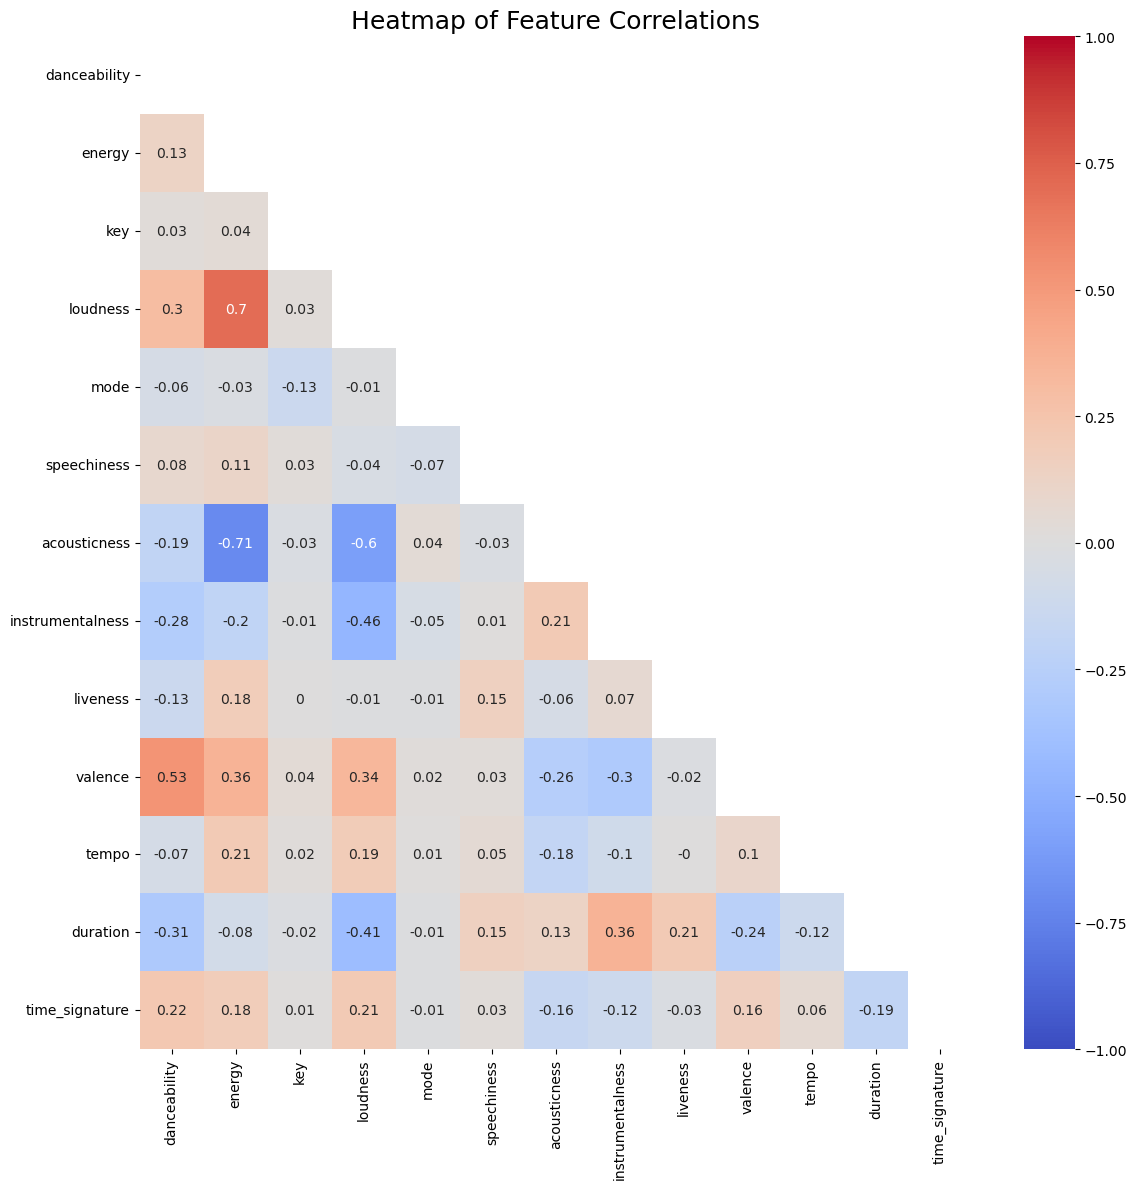

In [17]:
# Heatmap of correlation matrix

mask = np.zeros_like(songs_new.corr())

mask[np.triu_indices_from(mask)] = True

plt.figure(figsize = (12, 12))
plt.title("Heatmap of Feature Correlations", fontsize= 18)

sns.heatmap(round(songs_new.corr(), 2),
           cmap = "coolwarm", 
           annot = True,
           mask = mask, vmin = -1, vmax = 1)
plt.tight_layout();

# plt.savefig("../images/corr_heatmap.png")

**Notable correlations:**
- Loudness and energy have a high positive correlation which makes sense.
- Valence and danceability have a decent amount of positive correlation. This makes sense because valence is the musical positiveness of a track which intuitively relates to danceability.
- Acousticness and energy has a high negative correlation. This is expected because high acousticness would mean less electronic sounds, less harsh beats and more natural acoustic sounds, while high energy would entail faster tempos and more prominent beats (including electronic sounds).
- Acousticness and loudness has a  a decent amount of negative correlation as well, but this intuitively makes sense.

There doesn't seem to be any correlations out of the ordinary.

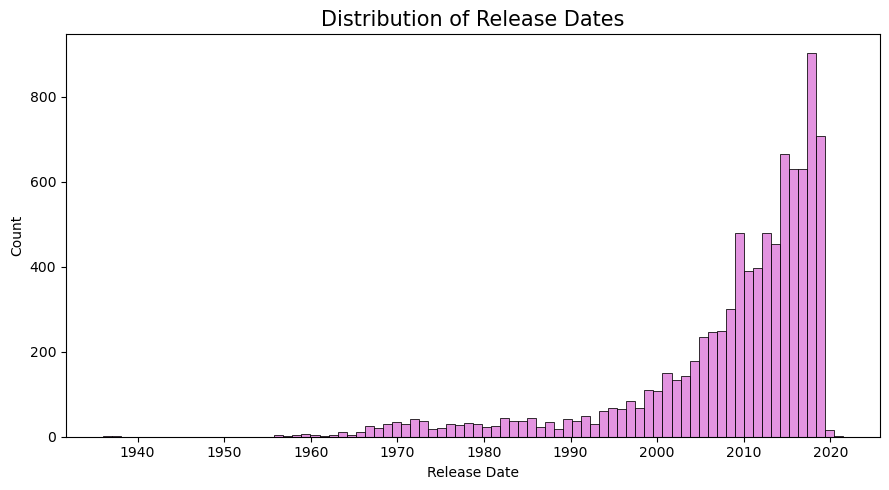

In [18]:
plt.figure(figsize= (9,5))
sns.histplot(data= songs_new, x= "release_date", color= "orchid")
plt.title("Distribution of Release Dates", fontsize= 15)
plt.xlabel("Release Date")
plt.tight_layout();

#plt.savefig("../images/release_distribution.png")

**We have a right skewed distribution for release dates, so most songs in our data were released more recently (primarily 2000 and up).**

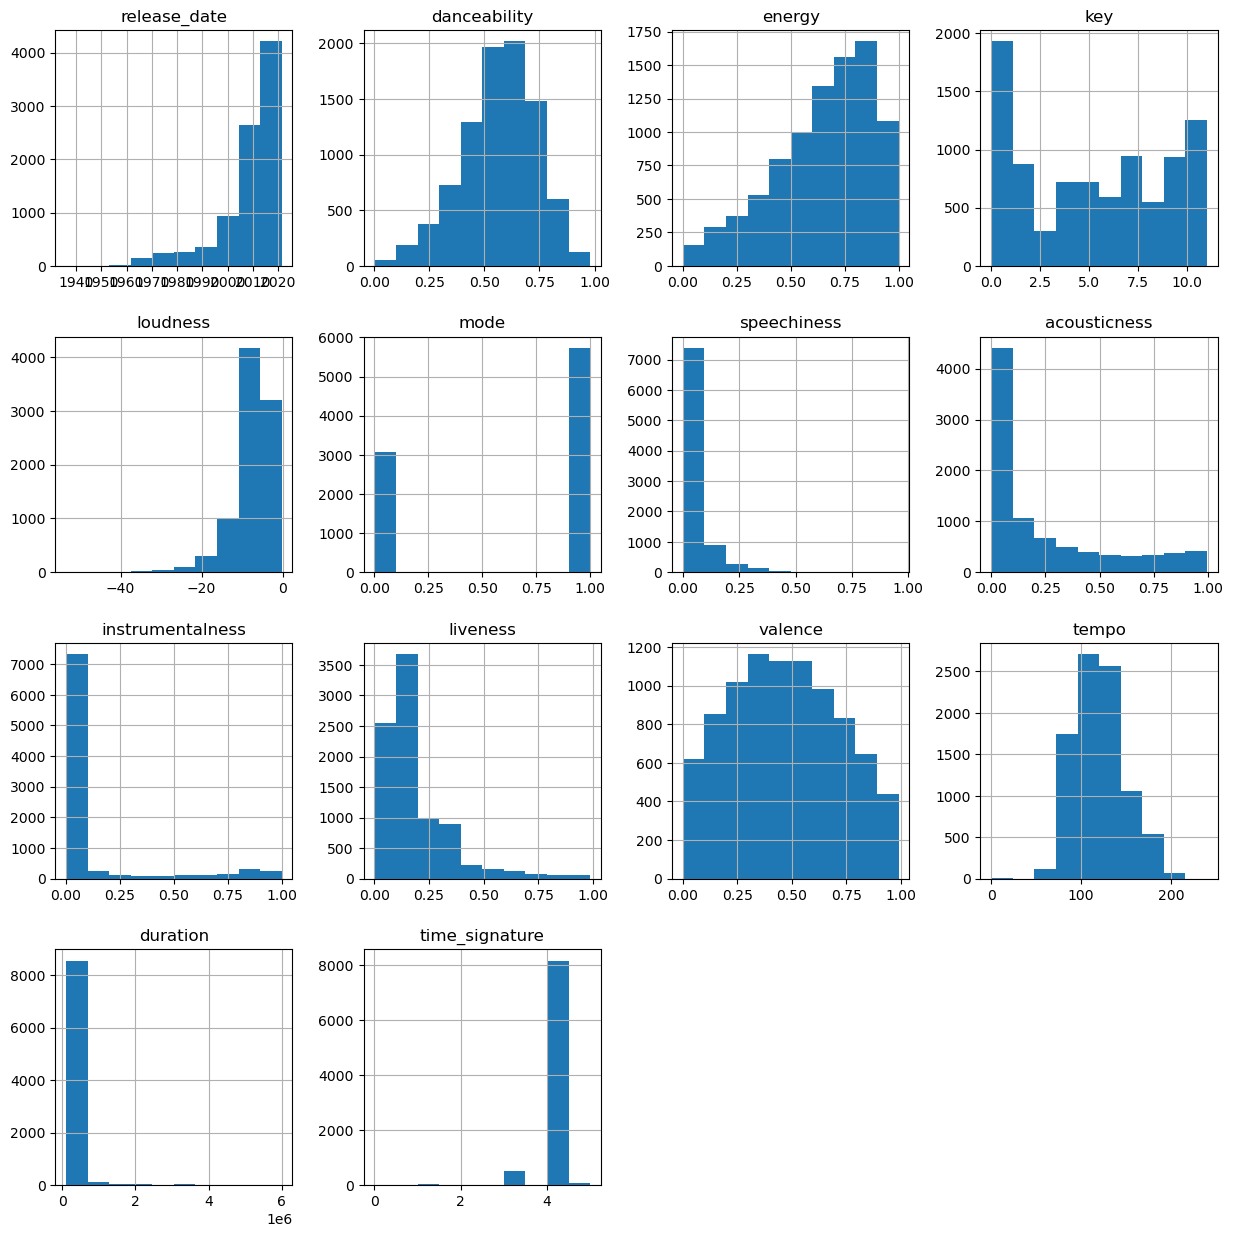

In [19]:
# here is a general overview of all the distributions for numeric columns
songs_new.hist(figsize=(15, 15));

**Lets look at the artists that occur the most in our song dataframe.**

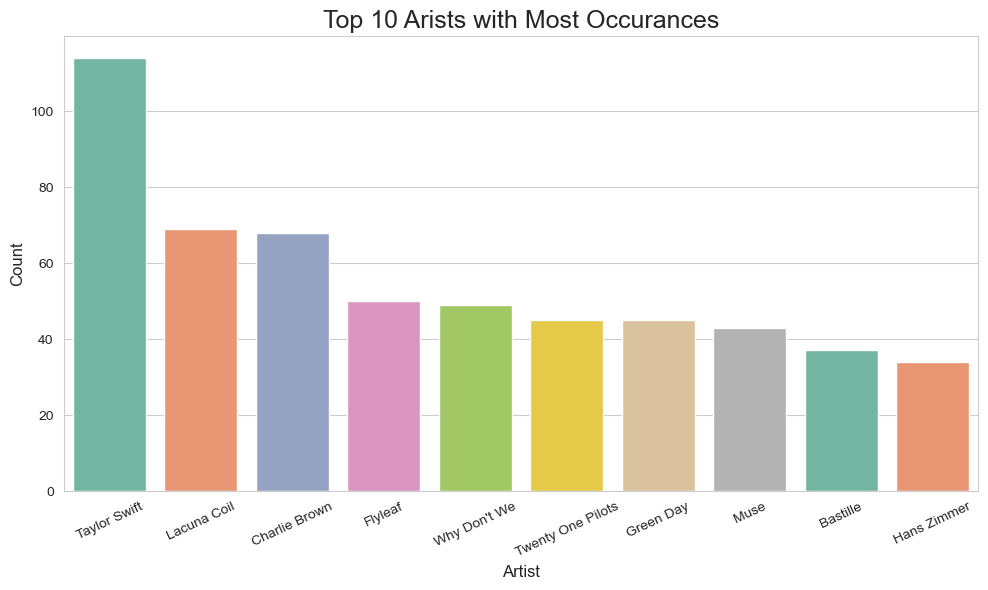

In [20]:
most_occurances_artists= songs_new["artist"].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.countplot(data=songs_new, x="artist", order= most_occurances_artists.index, palette="Set2")
plt.title("Top 10 Arists with Most Occurances", fontsize= 18)
plt.xlabel("Artist", fontsize= 12)
plt.ylabel("Count", fontsize= 12)
plt.xticks(rotation= 25)
plt.tight_layout();

#plt.savefig("../images/most_occur_artists.png")

**It looks like the creator of the playlist I gathered data from is a swiftie.**

#### Scatterplots

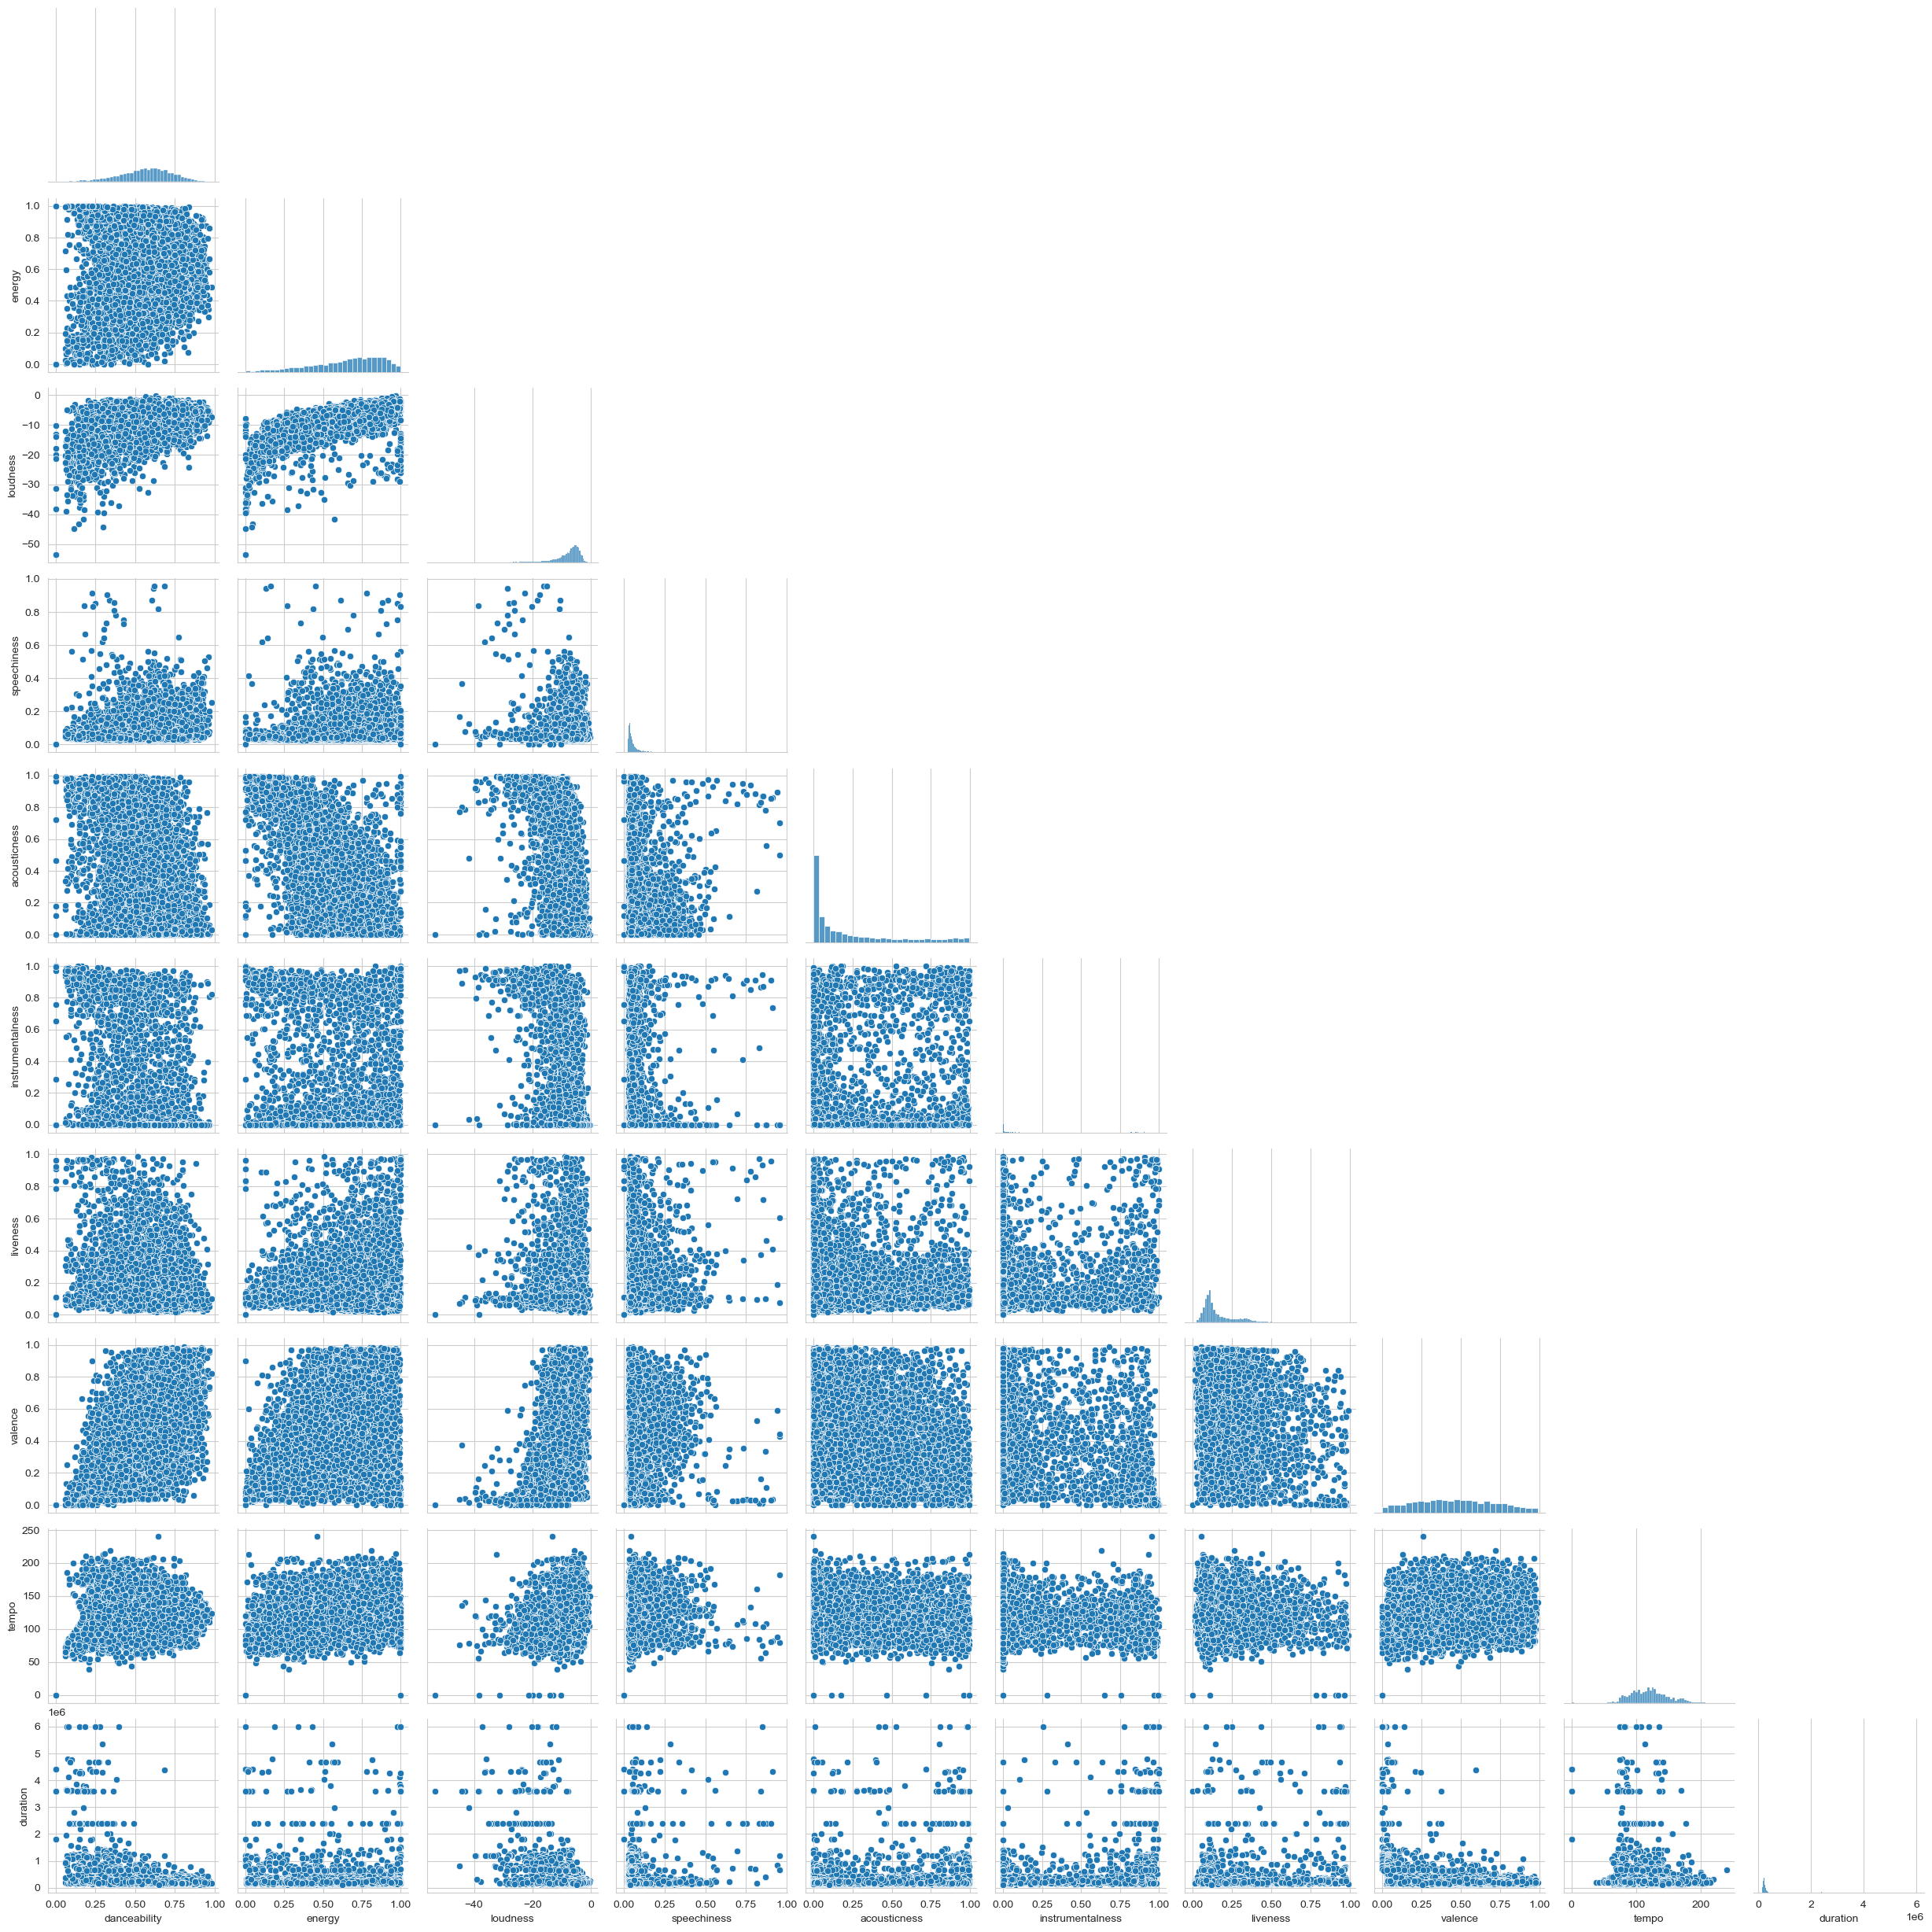

In [21]:
# look at scatterplots of song features
sns.pairplot(songs_new, corner = True,
             y_vars = ["danceability", "energy", "loudness", "speechiness", "acousticness", "instrumentalness",
                       "liveness", "valence", "tempo", "duration"],
             x_vars = ["danceability", "energy", "loudness", "speechiness", "acousticness", "instrumentalness",
                       "liveness", "valence", "tempo", "duration"]);

**Taking a closer look at scatterplots of features we know have notable correlations:**

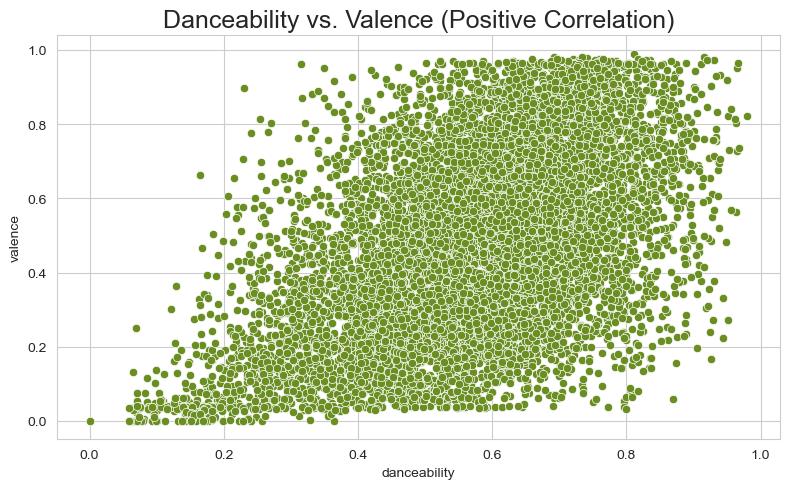

In [22]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=songs_new, x= "danceability", y= "valence", color= "olivedrab")
plt.title("Danceability vs. Valence (Positive Correlation)", fontsize= 18)
plt.tight_layout();
#plt.savefig("../images/danceability_vs_valence.png")

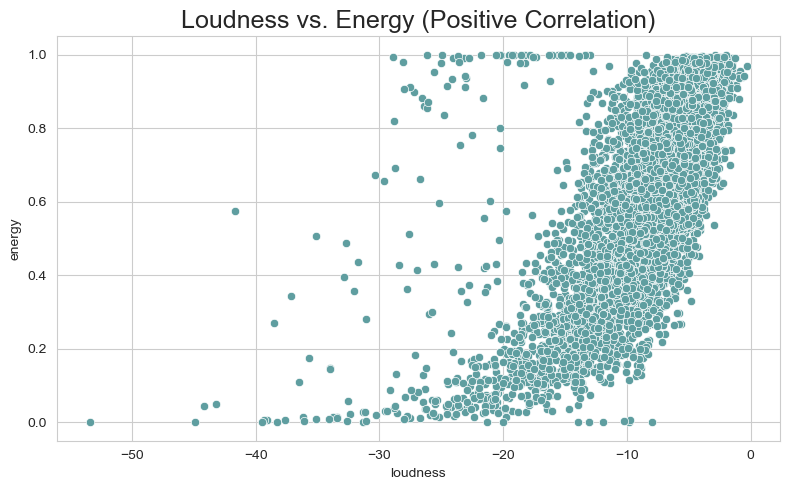

In [23]:
plt.figure(figsize=(8, 5))
plt.title("Loudness vs. Energy (Positive Correlation)", fontsize= 18)
sns.scatterplot(data=songs_new, x= "loudness", y= "energy", color= "cadetblue")
plt.tight_layout();
#plt.savefig("../images/loudness_vs_energy.png")

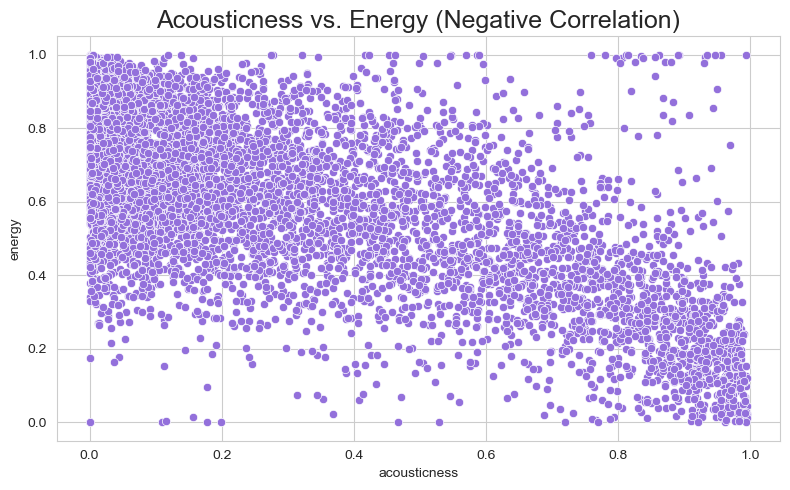

In [24]:
plt.figure(figsize=(8, 5))
plt.title("Acousticness vs. Energy (Negative Correlation)", fontsize= 18)
sns.scatterplot(data=songs_new, x= "acousticness", y= "energy", color= "mediumpurple")
plt.tight_layout();
#plt.savefig("../images/acousticness_vs_energy.png")

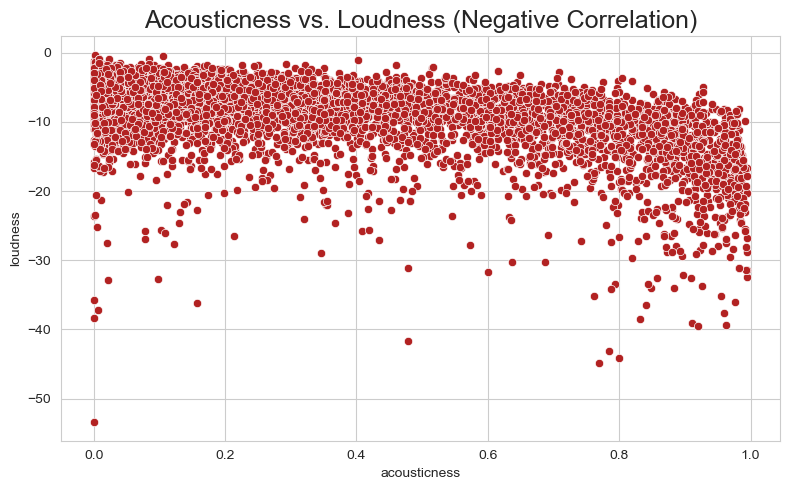

In [25]:
plt.figure(figsize=(8, 5))
plt.title("Acousticness vs. Loudness (Negative Correlation)", fontsize= 18)
sns.scatterplot(data=songs_new, x= "acousticness", y= "loudness", color= "firebrick")
plt.tight_layout();
#plt.savefig("../images/acousticness_vs_loudness.png")

## Clustering  

To enable multiclassification modeling on my Spotify song data, I plan to find a clustering algorithm (either K-means or DBSCAN), to group the songs into distinct clusters. The clusters will serve as a new column that classifies each song into a specific cluster. I will use PCA to find which columns eplain the data variance the most and use thosse columns to cluster.

In [26]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

Using PCA to find the components that best describe the variance in our data.

In [27]:
# defining columns looking to examine in PCA
pca_cols= ["speechiness", "liveness", "instrumentalness","valence", "energy", "acousticness", "tempo", "danceability", "loudness", "time_signature"]
X_pca= songs_new[pca_cols]

sc= StandardScaler()
X_pca_sc= sc.fit_transform(X_pca)

In [28]:
pca = PCA(random_state= 13)
pca.fit(X_pca_sc)
ex_var= pd.DataFrame(pca.explained_variance_ratio_, index= pca_cols, columns= ["explained_variance"]).sort_values(by= "explained_variance", ascending= False)
ex_var["cumsum_explained_var"]= np.cumsum(ex_var["explained_variance"])
ex_var

,explained_variance,cumsum_explained_var
speechiness,0.306658,0.306658
liveness,0.141824,0.448482
instrumentalness,0.113136,0.561618
valence,0.095394,0.657012
energy,0.090746,0.747759
acousticness,0.078592,0.826351
tempo,0.076470,0.902821
danceability,0.044621,0.947442
loudness,0.034814,0.982257
time_signature,0.017743,1.000000


For clustering, I will use: speechiness, liveness, instrumentalness, valence, energy, and acousticness based on the PCA findings above. We want to include the columns so we account for at least 80% or variance.

In [29]:
# defining X with the columns we want to cluster on
cluster_cols= ["speechiness", "liveness", "instrumentalness", "valence", "energy", "acousticness"]
X = songs_new[cluster_cols]

In [30]:
# standard scaling to equalize the feature importance
sc= StandardScaler()

X_scaled= sc.fit_transform(X)

### K Means

In [31]:
# fiting k-means clustering model
km= KMeans(n_clusters= 3, random_state= 13, n_init= "auto")
km.fit(X_scaled)

KMeans(n_clusters=3, n_init='auto', random_state=13)

#### Looking at the cluster centers

Inspired by lesson 7.01 on kmeans ([lesson](https://git.generalassemb.ly/vedapatel/7.01-lesson-kmeans/blob/main/clustering-k-means-starter.ipynb))

In [32]:
centroids = sc.inverse_transform(km.cluster_centers_) # need to unscale

centroids = pd.DataFrame(centroids, columns= X.columns)
centroids

,speechiness,liveness,instrumentalness,valence,energy,acousticness
0,0.049729,0.149524,0.030523,0.349526,0.382765,0.617577
1,0.074474,0.223354,0.803854,0.249985,0.516511,0.416705
2,0.075748,0.192650,0.022835,0.541193,0.755271,0.097640


#### Silhouette Score

In [33]:
silhouette_score(X_scaled, km.labels_)

0.2973781762898855

**The silhouette score is low so we will try a few different k's and use elbow method to find the best number of clusters (k).**

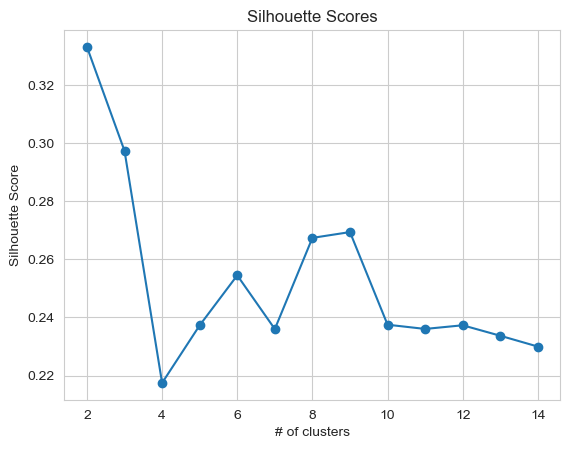

In [34]:
silhouette_scores_list = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state = 13, n_init= "auto")
    kmeans.fit(X_scaled)
    silhouette_scores_list.append(silhouette_score(X_scaled, kmeans.labels_))

plt.plot(range(2, 15), silhouette_scores_list, marker= "o")
plt.xlabel("# of clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores");

**I want to move forward with 9 clusters for KMeans clustering based on the assessment of this graph.**

In [35]:
# reproducing with 4 clusters
km9= KMeans(n_clusters= 9, random_state= 13, n_init= "auto")
km9.fit(X_scaled)

KMeans(n_clusters=9, n_init='auto', random_state=13)

In [36]:
silhouette_score(X_scaled, km9.labels_)

0.26940945996407145

In [37]:
# centroids for this kmeans 
centroids9 = sc.inverse_transform(km9.cluster_centers_) # need to unscale

centroids9 = pd.DataFrame(centroids9, columns= X.columns)
centroids9

,speechiness,liveness,instrumentalness,valence,energy,acousticness
0,0.056303,0.116101,0.014381,0.735873,0.754186,0.133703
1,0.081251,0.742353,0.206802,0.386698,0.726736,0.225974
2,0.063540,0.352079,0.019038,0.571867,0.815293,0.074119
3,0.043972,0.138714,0.024634,0.351996,0.348515,0.709287
4,0.059559,0.171846,0.737339,0.386398,0.714506,0.109433
5,0.276131,0.190275,0.019875,0.519963,0.693147,0.183535
6,0.726355,0.522413,0.529483,0.166856,0.624097,0.756390
7,0.052322,0.129336,0.017796,0.317927,0.683424,0.106560
8,0.050840,0.144593,0.815832,0.141207,0.238418,0.762181


#### Add kmeans cluster labels to songs dataframe

In [38]:
songs_new["kmeans_cluster"]= km9.labels_
songs_new.head()

,song,artist,album,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,time_signature,kmeans_cluster
0,...Ready For It?,Taylor Swift,...Ready For It?,2017-09-03,0.615,0.779,2,-6.454,1,0.1350,0.0665,0.000000,0.1550,0.453,160.000,208198,4,7
1,Life Changes,Thomas Rhett,Life Changes,2017-09-08,0.687,0.845,7,-4.370,1,0.0576,0.1000,0.000000,0.0452,0.809,87.972,190227,4,0
2,24K Magic,Bruno Mars,24K Magic,2016-11-17,0.818,0.803,1,-4.282,1,0.0797,0.0340,0.000000,0.1530,0.632,106.970,225983,4,0
3,Galway Girl,Ed Sheeran,÷ (Deluxe),2017-03-03,0.624,0.876,9,-3.374,1,0.1000,0.0735,0.000000,0.3270,0.781,99.943,170827,4,2
4,Photograph,Ed Sheeran,x (Deluxe Edition),2014-06-21,0.614,0.379,4,-10.480,1,0.0476,0.6070,0.000464,0.0986,0.201,107.989,258987,4,3


### DBSCAN

In [39]:
dbscan= DBSCAN()

dbscan.fit(X_scaled)

DBSCAN()

In [40]:
len(set(dbscan.labels_))

27

**We have 27 labels made with DBSCAN with no hypertuning of parameters.**

#### Silhouette Score

In [41]:
silhouette_score(X_scaled, dbscan.labels_)

-0.29955054604465675

Very low silhouette score.

#### Testing different epsilon and min_sample values.

In [71]:
eps_values=  [0.5, 0.8, 0.9]
min_samp_values= [5, 10, 15, 20]

In [72]:
silhouette_scores_list = []
for e in eps_values:
    for ms in min_samp_values:
        
        dbscan = DBSCAN(eps= e, min_samples= ms)
        dbscan.fit(X_scaled)
        unique_clusters= len(set(dbscan.labels_))
        if unique_clusters > 1:
            silhouette_scores_list.append((e, ms, silhouette_score(X_scaled, dbscan.labels_), unique_clusters))

In [73]:
gridsearch= pd.DataFrame(silhouette_scores_list, columns= ["epsilon", "min_sample", "silhouette_score", "num_clusters"])
gridsearch.sort_values(by= "silhouette_score", ascending= False)

,epsilon,min_sample,silhouette_score,num_clusters
9,0.9,10,0.394091,2
10,0.9,15,0.375682,2
11,0.9,20,0.357748,2
7,0.8,20,0.278336,4
6,0.8,15,0.263126,4
8,0.9,5,0.259757,7
5,0.8,10,0.211379,5
2,0.5,15,0.180107,3
3,0.5,20,0.147877,4
1,0.5,10,0.115768,6


We ideally would want more than two clusters, so I will move forward with epsilon= 0.8 and min_sample= 20 which produces 4 clusters.

In [84]:
dbscan_ideal= DBSCAN(eps= 0.8, min_samples= 20)

dbscan_ideal.fit(X_scaled)

DBSCAN(eps=0.8, min_samples=20)

In [85]:
silhouette_score(X_scaled, dbscan_ideal.labels_)

0.27833567360490286

In [86]:
songs_new["dbscan_cluster"]= dbscan_ideal.labels_
songs_new.head()

,song,artist,album,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,time_signature,kmeans_cluster,dbscan_cluster
0,...Ready For It?,Taylor Swift,...Ready For It?,2017-09-03,0.615,0.779,2,-6.454,1,0.1350,0.0665,0.000000,0.1550,0.453,160.000,208198,4,7,0
1,Life Changes,Thomas Rhett,Life Changes,2017-09-08,0.687,0.845,7,-4.370,1,0.0576,0.1000,0.000000,0.0452,0.809,87.972,190227,4,0,0
2,24K Magic,Bruno Mars,24K Magic,2016-11-17,0.818,0.803,1,-4.282,1,0.0797,0.0340,0.000000,0.1530,0.632,106.970,225983,4,0,0
3,Galway Girl,Ed Sheeran,÷ (Deluxe),2017-03-03,0.624,0.876,9,-3.374,1,0.1000,0.0735,0.000000,0.3270,0.781,99.943,170827,4,2,0
4,Photograph,Ed Sheeran,x (Deluxe Edition),2014-06-21,0.614,0.379,4,-10.480,1,0.0476,0.6070,0.000464,0.0986,0.201,107.989,258987,4,3,0


In [87]:
songs_new["kmeans_cluster"].value_counts()

7    2348
0    2190
3    1358
2    1167
4     516
5     503
8     393
1     310
6      31
Name: kmeans_cluster, dtype: int64

In [88]:
songs_new["dbscan_cluster"].value_counts()

 0    7123
-1    1307
 1     247
 2     139
Name: dbscan_cluster, dtype: int64

It seems like dbscan might have a lot more songs being counted as noise in the -1 cluster, so we will see how modeling goes for both cluster techniques. 

In [ ]:
# try to do radar trace

In [89]:
songs_new.to_csv("../data/spotify_songs_clustered.csv")